# Random Forest - 분류

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

DF = sns.load_dataset('iris')

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
DF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## Data Preprocessing

In [5]:
# Dataset
X = DF[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = DF['species']

In [7]:
# Train, Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (105, 4) (105,)
Test Data :  (45, 4) (45,)


## Modeling

### Model 학습
- random_state : 반복 실행 시 동일한 결과 출력
- n_jobs : 모든 CPU 코어 사용

In [8]:
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(n_estimators = 10,
                                  max_features = 2,
                                  random_state = 2045,
                                  n_jobs = -1)
Model_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=10, n_jobs=-1,
                       random_state=2045)

### 예측값 생성

In [9]:
y_hat = Model_rf.predict(X_test)

### 모델 평가

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_hat))

[[17  0  0]
 [ 0 14  0]
 [ 0  2 12]]


In [11]:
print(accuracy_score(y_test, y_hat))

0.9555555555555556


### Feature Importance

In [12]:
Model_rf.feature_importances_

array([0.1571031 , 0.03897972, 0.45102744, 0.35288974])

In [15]:
import matplotlib.pyplot as plt

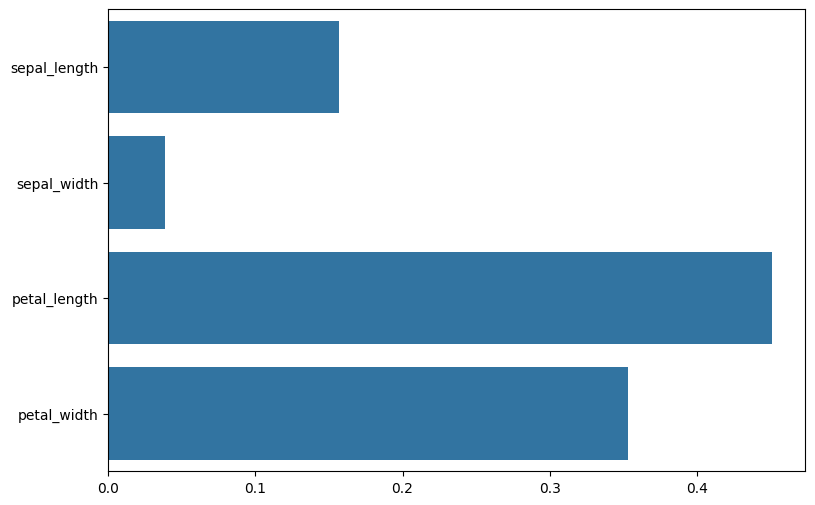

In [16]:
plt.figure(figsize = (9, 6))
sns.barplot(x = Model_rf.feature_importances_,
            y = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

## Hypoerparameter tuning

- n_estimators : 모델에 사용되는 의사결정나무의 개수
- max_features : 분할에 사용되는 Feature의 개수
- max_depth : 트리모델의 최대 깊이를 지정
- max_leaf_nodes : 말단 노드의 최대 개수
- min_samples_split : 분할을 위한 최소한의 샘플데이터 개수(default 2)
- min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플데이터 개수(default 1)

### RandomForestClassifier 객체 생성

In [18]:
from sklearn.ensemble import RandomForestClassifier
Model_rf = RandomForestClassifier()

### GridSearch

In [19]:
params = {'n_estimators':[10, 50, 100, 150],
          'max_features':[2, 4],
          'max_depth':[2, 3, 4, 5, 6],
          
          'min_samples_split': [3, 4, 5, 6, 7], 
          # 노드를 분할하기위한 최소한의 샘플 데이터수, 과적합 제어에 사용,
          # 작게 사용할 수록 분할 노드가 많아져 과적합 가능성 증가
          
          'random_state':[2045]}

In [20]:
from sklearn.model_selection import GridSearchCV, KFold

grid_cv = GridSearchCV(Model_rf,
                       param_grid = params,
                       scoring = 'accuracy',
                       cv = KFold(n_splits = 5),
                       refit = True, # 최적 파라미터 모델 저장  model.best_estimator_
                       n_jobs = -1)

In [21]:
from datetime import datetime
start_time = datetime.now()

grid_cv.fit(X_train, y_train)

end_time = datetime.now()
print('Elapsed Time : ', end_time - start_time)

Elapsed Time :  0:00:10.175697


In [23]:
grid_cv.best_score_ # Best Accuracy

0.9523809523809523

In [24]:
# 최적 하이퍼파라미터 확인
grid_cv.best_params_

{'max_depth': 2,
 'max_features': 2,
 'min_samples_split': 3,
 'n_estimators': 10,
 'random_state': 2045}

### 최적 모델 생성 및 평가

In [25]:
Model_CV = grid_cv.best_estimator_ 

In [26]:
y_hat = Model_CV.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_hat))

[[17  0  0]
 [ 0 14  0]
 [ 0  1 13]]


In [28]:
print(accuracy_score(y_test, y_hat))

0.9777777777777777


# Gradient Boost Machine
- RF와 비교하기

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

dataset = pd.read_csv('data/Social_Network_Ads.csv')

In [34]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [35]:
X = dataset.iloc[:, [2,3]]
y = dataset.iloc[:, 4]

In [36]:
# dataset을 Training 과 Test set 으로 분리
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [37]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### Random Forest

In [38]:
# Training set 에 대해 Random Forest Classifier model 을 fitting
rf = RandomForestClassifier(n_estimators=10, 
                            criterion='entropy', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [39]:
y_pred = rf.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1]

Test set true counts =  22
predicted true counts =  23
accuracy = 0.91


In [40]:
# making confusion matrix
print("confution matrix\n", 
      confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()
print("f1 score\n", f1_score(y_test, y_pred, labels=[1, 0]))

confution matrix
 [[19  3]
 [ 4 54]]

f1 score
 0.8444444444444444


## Gradient Boosting Classifier
- min_samples_split : node 분리에 필요한 최소 sample 수 => overfitting 방지
- max_depth : tree 깊이 조절 => overfitting 방지
- learning_rate : 각 tree 의 기여도 조정, n_estimators 와 trade-off
- n_estimators : number of sequential trees

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate=0.1, 
                                n_estimators=500, max_depth=5)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=500)

In [42]:

GradientBoostingClassifier
GradientBoostingClassifier(max_depth=5, n_estimators=500)
y_pred = gb.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(
            sum(y_pred == y_test) / len(y_test)))

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 1]

Test set true counts =  22
predicted true counts =  22
accuracy = 0.93


In [43]:
# making confusion matrix
print("confution matrix\n", 
      confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()
print("f1 score\n", f1_score(y_test, y_pred, labels=[1, 0]))

confution matrix
 [[19  3]
 [ 3 55]]

f1 score
 0.8636363636363636


## Visualization

In [44]:
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])   
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])    

In [45]:
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1       
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1  

X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), 
                     np.arange(x2_min, x2_max, 0.1))
XX = np.column_stack([X1.ravel(), X2.ravel()])
Y_rf = np.array(rf.predict(XX))
Y_gb = np.array(gb.predict(XX))

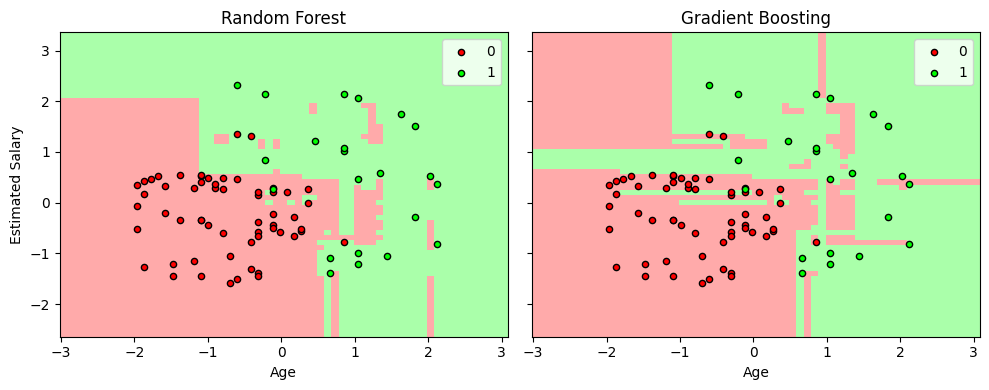

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Random Forest
ax1.pcolormesh(X1, X2, Y_rf.reshape(X1.shape), 
               cmap=cmap_light, shading='auto') 
for i in range(2):
    ax1.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], s=20, 
                color=cmap_bold(i), label=i, edgecolor='k')
ax1.set_title('Random Forest')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()

# Gradient Boosting
ax2.pcolormesh(X1, X2, Y_gb.reshape(X1.shape), 
               cmap=cmap_light, shading='auto') 
for i in range(2):
    ax2.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], s=20, 
                color=cmap_bold(i), label=i, edgecolor='k')
ax2.set_title('Gradient Boosting')
ax2.set_xlabel('Age')
ax2.legend()
plt.tight_layout()

In [47]:
gb.feature_importances_       # Age, EstimatedSalary 의 중요도

array([0.49454421, 0.50545579])

In [48]:
feature_imp = pd.Series(gb.feature_importances_, 
            ['Age', 'EstimatedSalary']).sort_values(ascending=False)
feature_imp

EstimatedSalary    0.505456
Age                0.494544
dtype: float64

<Axes: title={'center': 'feature importance'}>

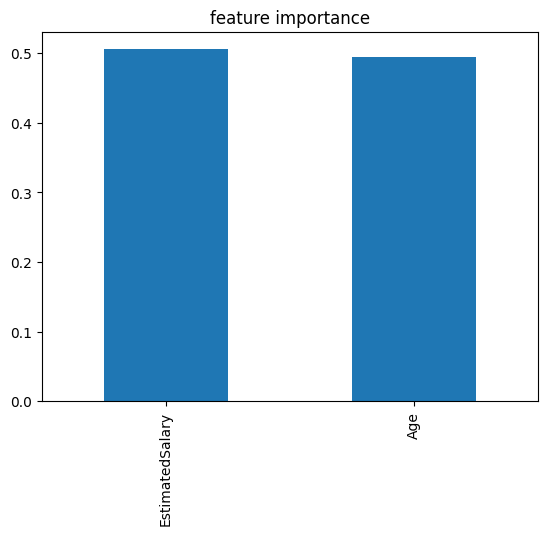

In [49]:
feature_imp.plot(kind='bar', title='feature importance')